Alunos(as)/RAs:<br>
Bruna Mezzari Carlos -	235624<br>
Jean Antonio Ribeiro -	265739<br>
Kellen Natalice Vilharva -	235493<br>
Roberto Junio de Almeida Candian -	214572<br>
Tatiana Aparecida de Almeida -	229136



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from sklearn import linear_model
#from google.colab import drive

#drive.mount('/content/drive')

# Leitura dos dados

In [9]:
#!git clone https://github.com/JeanKusanagi/E1--Vaccine-immunology

DATA_DIR = './E1--Vaccine-immunology/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/JeanKusanagi/E1--Vaccine-immunology')
    print('Done!')

Loading data...
Done!


In [13]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv")

#df = df.rename(columns={'Hepatite B  em crianças até 30 dias': 'Hepatite B30'})
#df = df.rename(columns={'Pneumocócica(1° ref)': 'Pneumocócica1'})
#df = df.rename(columns={'Meningococo C (1° ref)': 'Meningococo1'})
#df = df.rename(columns={'Poliomielite(1° ref)': 'Poliomielite1'})
df.head(40)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,88.31,0.00,0.00,0.00,8.85,0.00,0.00,58.24,0.00,5.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64.76,0.00,0.00,71.37,0.00,0.00,0.00,0.00,4.69,38.27
1,1995,103.63,0.00,0.00,0.00,10.50,0.00,0.00,77.83,0.00,4.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.54,0.00,0.00,86.86,0.00,0.00,0.00,0.00,23.61,45.71
2,1996,104.21,0.00,0.00,0.00,16.50,0.00,0.00,80.86,0.00,5.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.25,0.00,0.00,80.40,0.01,0.00,0.00,0.00,42.10,50.01
3,1997,117.12,0.00,0.00,0.00,5.79,0.00,0.00,89.27,0.00,7.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.50,0.00,0.00,108.61,0.03,0.00,0.00,0.00,106.68,68.95
4,1998,111.61,0.00,0.00,0.00,12.63,0.00,0.00,95.30,0.00,18.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.97,0.00,0.00,95.26,0.84,0.00,0.00,0.00,104.36,70.65
5,1999,117.28,0.00,0.00,0.00,83.50,0.00,0.00,99.08,0.00,29.06,0.00,0.00,0.00,0.00,6692.10,0.00,0.00,94.46,0.00,0.00,99.31,5.09,0.00,0.00,0.00,100.06,86.57
6,2000,111.74,0.00,0.00,0.00,91.08,0.00,0.00,101.44,0.00,37.14,0.00,0.00,0.00,0.00,77.50,0.00,0.00,94.71,0.00,0.00,105.35,87.85,0.00,0.00,0.00,80.12,76.50
7,2001,112.60,0.00,0.00,0.00,91.88,0.00,0.00,102.83,0.00,40.24,0.00,0.00,0.00,0.00,88.43,0.00,0.00,97.45,0.00,0.00,103.85,93.10,0.00,0.00,0.00,83.86,79.85
8,2002,110.28,0.00,0.00,0.00,91.47,0.00,0.00,100.01,0.00,38.70,0.00,0.00,0.00,0.00,96.92,0.00,0.00,44.69,0.00,0.00,96.02,38.98,0.00,0.00,53.86,81.35,76.09
9,2003,108.47,0.00,0.00,0.00,92.00,0.00,0.00,100.48,0.00,34.68,0.00,0.00,0.00,0.00,112.95,0.00,0.00,1.41,0.00,0.00,4.06,1.72,0.00,0.00,97.47,83.19,72.97


# Funções

Remove a última linha do DataSet, pois a coluna Ano contém um valor string igual a 'Total'.

In [57]:
def NovoDataSet(df):
  new_df = df.copy()

  it=0
  for i, row in new_df.iterrows():
    if row['Ano'] == 'Total':
      #print('Achou')
      it=i
  print('Iterador: ', it)
  new_df  =new_df.drop(it)
  
  return new_df

new_df = NovoDataSet(df)
new_df.head(40)

Iterador:  27


,Ano,1 Região Norte,2 Região Nordeste,3 Região Sudeste,4 Região Sul,5 Região Centro-Oeste,Total
0,1994,35.07,64.93,73.72,87.00,41.33,58.24
1,1995,50.83,70.36,94.11,86.29,58.92,77.83
2,1996,61.96,73.00,93.87,85.23,80.57,80.86
3,1997,69.68,84.65,96.64,94.62,85.90,89.27
4,1998,88.22,87.37,103.90,91.35,101.91,95.30
5,1999,88.44,93.87,106.81,93.60,105.78,99.08
6,2000,105.90,97.15,102.07,101.27,110.65,101.44
7,2001,105.86,103.72,100.79,102.80,105.71,102.83
8,2002,107.77,99.05,98.42,98.42,104.21,100.01
9,2003,105.89,99.99,98.75,100.24,104.13,100.48


In [ ]:
from numpy.random import rand

def fill_dummy_values(df, scaling_factor):
  # Create copy of dataframe 
  df_dummy = df.copy(deep=True)
  
  # Iterate over each column
  for col in df_dummy:
    # Get column, column missing values and range   
    col = df_dummy[col]
    col = pd.to_numeric(col)
    #col = pd.to_numeric(col, errors='ignore')
    col_null = col.isnull()       
    num_nulls = col_null.sum()   
    col_range = col.max() - col.min()
    
    # Shift and scale dummy values   
    dummy_values = (rand(num_nulls) - 2)    
    dummy_values = dummy_values * scaling_factor * col_range + col.min()
    
    # Return dummy values   
    col[col_null] = dummy_values

  return df_dummy

fill_dummy_values(new_df,0.3)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,88.31,0.00,0.00,0.00,8.85,0.00,0.00,58.24,0.00,5.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64.76,0.00,0.00,71.37,0.00,0.00,0.00,0.00,4.69,38.27
1,1995,103.63,0.00,0.00,0.00,10.50,0.00,0.00,77.83,0.00,4.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.54,0.00,0.00,86.86,0.00,0.00,0.00,0.00,23.61,45.71
2,1996,104.21,0.00,0.00,0.00,16.50,0.00,0.00,80.86,0.00,5.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.25,0.00,0.00,80.40,0.01,0.00,0.00,0.00,42.10,50.01
3,1997,117.12,0.00,0.00,0.00,5.79,0.00,0.00,89.27,0.00,7.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.50,0.00,0.00,108.61,0.03,0.00,0.00,0.00,106.68,68.95
4,1998,111.61,0.00,0.00,0.00,12.63,0.00,0.00,95.30,0.00,18.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.97,0.00,0.00,95.26,0.84,0.00,0.00,0.00,104.36,70.65
5,1999,117.28,0.00,0.00,0.00,83.50,0.00,0.00,99.08,0.00,29.06,0.00,0.00,0.00,0.00,6692.10,0.00,0.00,94.46,0.00,0.00,99.31,5.09,0.00,0.00,0.00,100.06,86.57
6,2000,111.74,0.00,0.00,0.00,91.08,0.00,0.00,101.44,0.00,37.14,0.00,0.00,0.00,0.00,77.50,0.00,0.00,94.71,0.00,0.00,105.35,87.85,0.00,0.00,0.00,80.12,76.50
7,2001,112.60,0.00,0.00,0.00,91.88,0.00,0.00,102.83,0.00,40.24,0.00,0.00,0.00,0.00,88.43,0.00,0.00,97.45,0.00,0.00,103.85,93.10,0.00,0.00,0.00,83.86,79.85
8,2002,110.28,0.00,0.00,0.00,91.47,0.00,0.00,100.01,0.00,38.70,0.00,0.00,0.00,0.00,96.92,0.00,0.00,44.69,0.00,0.00,96.02,38.98,0.00,0.00,53.86,81.35,76.09
9,2003,108.47,0.00,0.00,0.00,92.00,0.00,0.00,100.48,0.00,34.68,0.00,0.00,0.00,0.00,112.95,0.00,0.00,1.41,0.00,0.00,4.06,1.72,0.00,0.00,97.47,83.19,72.97


Cria um DataSet com os valores de um conjunto de DataSet, baseado em um determinado Ano.

In [14]:
def BuscaDadosPorAno(ano, bases):
  Local = []
  BCG = []
  HepatiteB30 = []
  RotavirusHumano = []
  MeningococoC = []
  HepatiteB = []
  Penta = []
  Pneumococica = []
  Poliomielite = []
  Poliomielite4 = []
  FebreAmarela = []
  HepatiteA = []
  Pneumococica1 = []
  MeningococoC1 = []
  Poliomielite1  = []	
  TripliceViralD1 = []
  TripliceViralD2 = []
  TetraViral = []
  DTP = []
  DTP_REF = []
  TripliceBacteriana = []
  Sarampo = []
  Haemophilus = []
  Dupla = []
  dTpaGestante = []
  Tetravalente = []
  Ignorado = []
  Total = []

  s = '/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/'
  for i in bases:
    r=s+i
    #print(r)
    base = pd.read_csv(r)
    for index, row in base.iterrows():
      if row['Ano'] == ano:
        #print(row['Ano'], row['BCG'])
        #print(row['Total'])
        Local.append(i)
        BCG.append(row['BCG'])
        HepatiteB30.append(row['Hepatite B em crianças até 30 dias'])
        RotavirusHumano.append(row['Rotavírus Humano'])
        MeningococoC.append(row['Meningococo C'])
        HepatiteB.append(row['Hepatite B'])
        Penta.append(row['Penta'])
        Pneumococica.append(row['Pneumocócica'])
        Poliomielite.append(row['Poliomielite'])
        Poliomielite4.append(row['Poliomielite 4 anos'])
        FebreAmarela.append(row['Febre Amarela'])
        HepatiteA.append(row['Hepatite A'])
        Pneumococica1.append(row['Pneumocócica(1° ref)'])
        MeningococoC1.append(row['Meningococo C (1° ref)'])
        Poliomielite1.append(row['Poliomielite(1° ref)'])	
        TripliceViralD1.append(row['Tríplice Viral  D1'])
        TripliceViralD2.append(row['Tríplice Viral  D2'])
        TetraViral.append(row['Tetra Viral(SRC+VZ)'])
        DTP.append(row['DTP'])
        DTP_REF.append(row['DTP REF (4 e 6 anos)'])
        TripliceBacteriana.append(row['Tríplice Bacteriana(DTP)(1° ref)'])
        Sarampo.append(row['Sarampo'])
        Haemophilus.append(row['Haemophilus influenzae b'])
        Dupla.append(row['Dupla adulto e tríplice acelular gestante'])
        dTpaGestante.append(row['dTpa gestante'])
        Tetravalente.append(row['Tetravalente (DTP/Hib) (TETRA)'])
        Ignorado.append(row['Ignorado'])
        #Total.append(row['Total'])

  new_tb = pd.DataFrame()

  new_tb['Local'] = Local
  new_tb['BCG'] = BCG
  new_tb['Hepatite B em crianças até 30 dias'] = HepatiteB30
  new_tb['Rotavírus Humano'] = RotavirusHumano
  new_tb['Meningococo C'] = MeningococoC
  new_tb['Hepatite B'] = HepatiteB
  new_tb['Penta'] = Penta
  new_tb['Pneumocócica'] = Pneumococica
  new_tb['Poliomielite'] = Poliomielite
  new_tb['Poliomielite 4 anos'] = Poliomielite4
  new_tb['Febre Amarela'] = FebreAmarela
  new_tb['Hepatite A'] = HepatiteA
  new_tb['Poliomielite(1° ref)'] = Pneumococica1
  new_tb['Meningococo C (1° ref)'] = MeningococoC1
  new_tb['Poliomielite(1° ref)'] = Poliomielite1
  new_tb['Tríplice Viral D1'] = TripliceViralD1
  new_tb['Tríplice Viral D2'] = TripliceViralD2
  new_tb['Tetra Viral(SRC+VZ)'] = TetraViral
  new_tb['DTP'] = DTP
  new_tb['DTP REF (4 e 6 anos)'] = DTP_REF
  new_tb['Tríplice Bacteriana(DTP)(1° ref)'] = TripliceBacteriana
  new_tb['Sarampo'] = Sarampo
  new_tb['Haemophilus influenzae b'] = Haemophilus
  new_tb['Dupla adulto e tríplice acelular gestante'] = Dupla
  new_tb['dTpa gestante'] = dTpaGestante
  new_tb['Tetravalente (DTP/Hib) (TETRA)'] = Tetravalente
  new_tb['Ignorado'] = Ignorado
  #new_tb['Total'] = Total

  return new_tb

Busca dados de uma determinada doença em um conjunto de base de dados para todos os anos.

In [16]:
def BuscaDadosPorDoenca(ano, doenca, bases):
  s = '/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/'
  r=s+bases[0]
  db = pd.read_csv(r)
  variacao_anos = db['Ano']
  #variacao_anos = [2020]
  #print(variacao_anos)

  new_tb = pd.DataFrame()
  #regioes = []
  #v = []

  new_tb['Ano'] = db['Ano']

  for i in bases:
    #regioes.append(i)
    r=s+i
    #print(r)
    base = pd.read_csv(r)
    new_tb[i] = base[doenca]
    #for index, row in base.iterrows():
      #print(row['Ano'])
      #new_tb[doenca] = row[doenca]
      #for a in variacao_anos:
        #print(a)
        #v.append(row[doenca])
        #print(row[doenca])
        #new_tb[a] = row[doenca]
        #if row[doenca] == ano:
        #  pass
        #  new_tb[doenca] = row[doenca]

        #print(row['Ano'], row['BCG'])
        #print(row['Total'])
        #Local.append(i)
        #BCG.append(row['BCG'])
      #new_tb[a] = v
      #v=[]

    #new_tb['Anos'] = v
    #new_tb['Regiões'] = regioes

  return new_tb

bases_sudeste = [
        'ano_imuno_sudeste.csv',
        'ano_imuno_sudeste_capitais.csv',
        'ano_imuno_sudeste_extrprobeza=n.csv',
        'ano_imuno_sudeste_extrprobeza=s.csv'
]

r = BuscaDadosPorDoenca(2020,'BCG',bases_sudeste)
r = r.rename(columns={'ano_imuno_sudeste.csv': 'Sudeste'})
r = r.rename(columns={'ano_imuno_sudeste_capitais.csv': 'Sudeste Capitais'})
r = r.rename(columns={'ano_imuno_sudeste_extrprobeza=n.csv': 'Sudeste Extrema Probeza n'})
r = r.rename(columns={'ano_imuno_sudeste_extrprobeza=s.csv': 'Sudeste Extrema Probeza s'})
r

,Ano,Sudeste,Sudeste Capitais,Sudeste Extrema Probeza n,Sudeste Extrema Probeza s
0,1994,94.31,149.05,94.31,95.59
1,1995,112.61,117.34,112.61,123.51
2,1996,107.16,108.94,107.16,126.73
3,1997,120.77,139.98,120.77,102.36
4,1998,117.59,134.62,117.59,104.40
5,1999,122.74,147.45,122.74,110.89
6,2000,110.69,109.66,110.69,114.83
7,2001,107.92,108.52,107.92,109.19
8,2002,106.16,107.44,106.16,103.78
9,2003,104.80,110.45,104.80,99.02


Iterador:  28


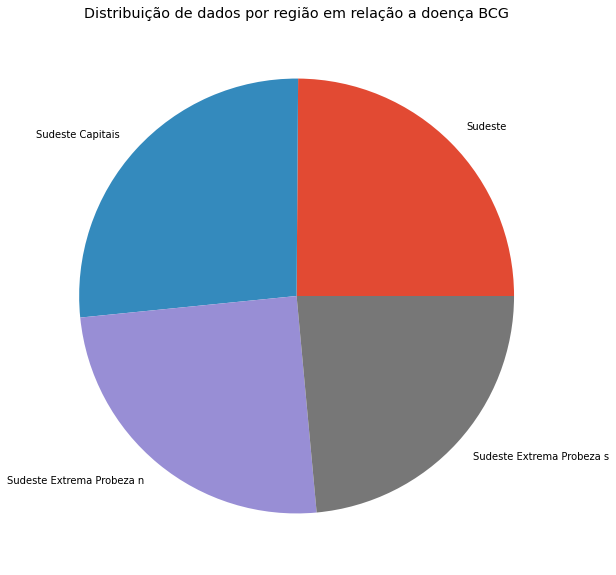

In [ ]:
# cria um DataSet sem a úúltima linha (que possui uma célula com o valor 'Total')
new_r = NovoDataSet(r)

#new_r['Sudeste'] = pd.to_numeric(new_r['Sudeste'])

labels = new_r.columns[1:]
#labels = ['Sudeste','Sudeste Capitais','Sudeste Extrema Probeza n','Sudeste Extrema Probeza s']
medias = [np.mean(new_r['Sudeste']),np.mean(new_r['Sudeste Capitais']),np.mean(new_r['Sudeste Extrema Probeza n']),np.mean(new_r['Sudeste Extrema Probeza s'])]

plt.style.use("ggplot")
plt.figure(figsize = (10, 10))
plt.pie(medias, labels=labels)
plt.title("Distribuição de dados por região em relação a doença BCG")
plt.show()

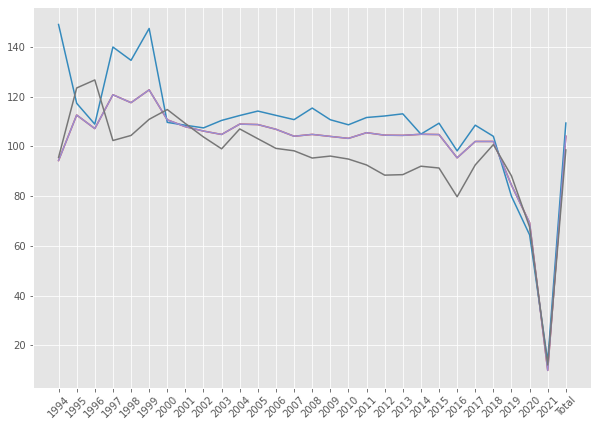

In [ ]:
r = BuscaDadosPorDoenca(2020,'BCG',bases_sudeste)
plt.figure(figsize = (10, 7))
plt.xticks(rotation=45)
plt.plot(r['Ano'], r['ano_imuno_sudeste.csv'])
plt.plot(r['Ano'], r['ano_imuno_sudeste_capitais.csv'])
plt.plot(r['Ano'], r['ano_imuno_sudeste_extrprobeza=n.csv'])
plt.plot(r['Ano'], r['ano_imuno_sudeste_extrprobeza=s.csv'])
#r

# Correlação

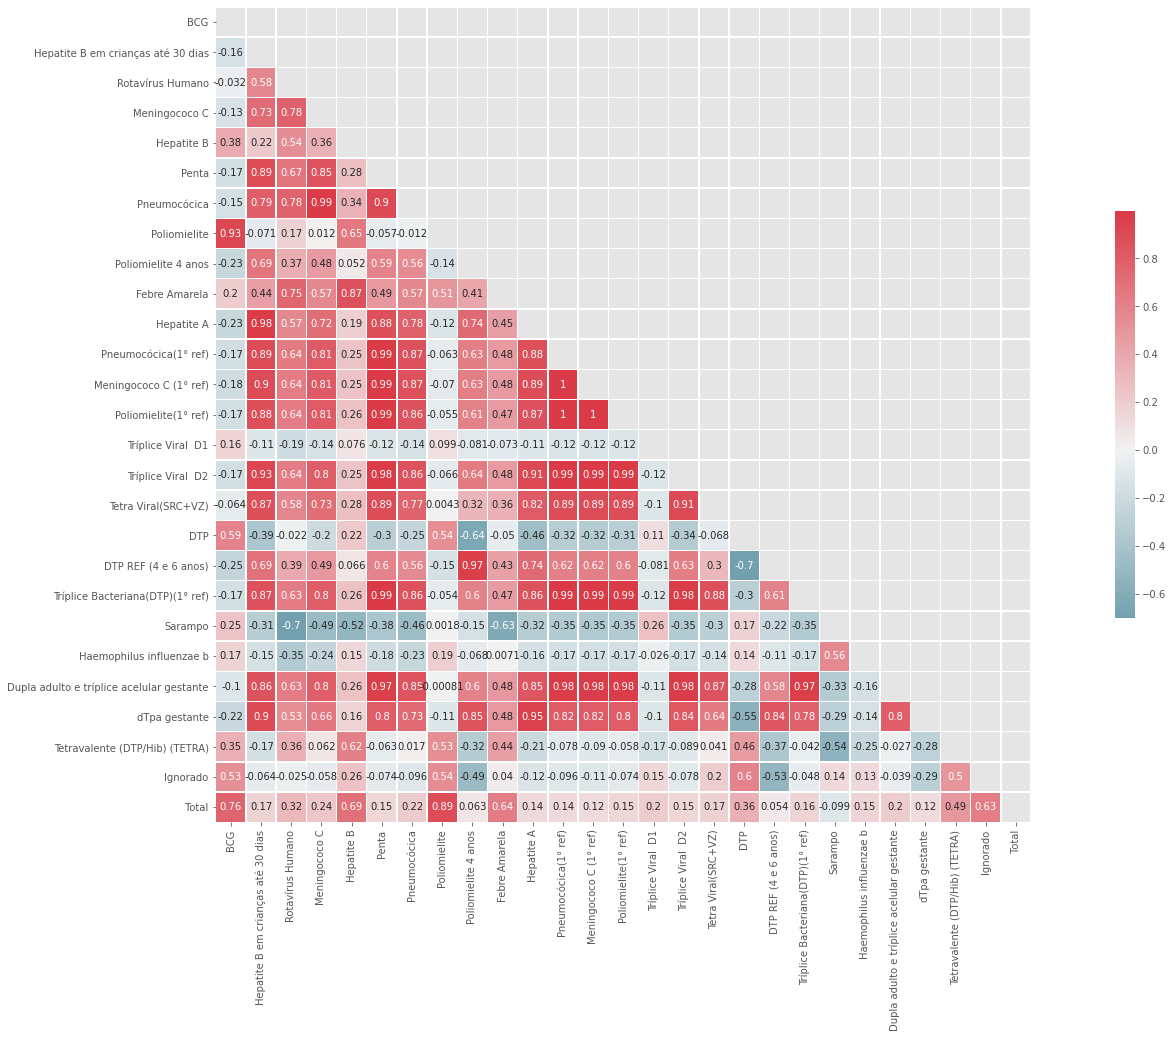

In [ ]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
import numpy as np
from scipy import stats

print("Penta vs Pneumocócica(1° ref)")
print("\tPearson Original: ", stats.pearsonr(df['Penta'],df['Pneumocócica(1° ref)']))
print("\tSpearman Original:", stats.spearmanr(df['Penta'],df['Pneumocócica(1° ref)']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['Penta'],df['Pneumocócica(1° ref)']))

print("\nPenta vs Meningococo C (1° ref)")
print("\tPearson Original: ", stats.pearsonr(df['Penta'],df['Meningococo C (1° ref)']))
print("\tSpearman Original:", stats.spearmanr(df['Penta'],df['Meningococo C (1° ref)']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['Penta'],df['Meningococo C (1° ref)']))

print("\nPenta vs Poliomielite(1° ref)")
print("\tPearson Original: ", stats.pearsonr(df['Penta'],df['Poliomielite(1° ref)']))
print("\tSpearman Original:", stats.spearmanr(df['Penta'],df['Poliomielite(1° ref)']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['Penta'],df['Poliomielite(1° ref)']))

print("\nHaemophilus influenzae b vs Febre Amarela")
print("\tPearson Original: ", stats.pearsonr(df['Haemophilus influenzae b'],df['Febre Amarela']))
print("\tSpearman Original:", stats.spearmanr(df['Haemophilus influenzae b'],df['Febre Amarela']))
print("\tPearson na Tabela de Ranks:", stats.pearsonr(df['Haemophilus influenzae b'],df['Febre Amarela']))

Penta vs Pneumocócica(1° ref)
	Pearson Original:  (0.9894417787009584, 3.4504343399081134e-24)
	Spearman Original: SpearmanrResult(correlation=0.9572997675422628, pvalue=4.446479400019536e-16)
	Pearson na Tabela de Ranks: (0.9894417787009584, 3.4504343399081134e-24)

Penta vs Meningococo C (1° ref)
	Pearson Original:  (0.9881546088279971, 1.6182534058298055e-23)
	Spearman Original: SpearmanrResult(correlation=0.9506426064327895, pvalue=3.021985752813113e-15)
	Pearson na Tabela de Ranks: (0.9881546088279971, 1.6182534058298055e-23)

Penta vs Poliomielite(1° ref)
	Pearson Original:  (0.989692473012454, 2.498161140815549e-24)
	Spearman Original: SpearmanrResult(correlation=0.9499768903218421, pvalue=3.6067983639441724e-15)
	Pearson na Tabela de Ranks: (0.989692473012454, 2.498161140815549e-24)

Haemophilus influenzae b vs Febre Amarela
	Pearson Original:  (0.0071488783574035425, 0.970640608527854)
	Spearman Original: SpearmanrResult(correlation=-0.498613172615542, pvalue=0.005903804976644

# Penta vs Pneumocócica(1º ref)

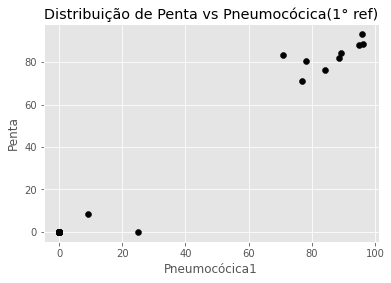

In [ ]:
plt.scatter(df['Penta'],df['Pneumocócica(1° ref)'],  color='black')
plt.title("Distribuição de Penta vs Pneumocócica(1° ref)")
plt.xlabel("Pneumocócica1")
plt.ylabel("Penta")
plt.show()

Menor valor de Penta:  0.0
Maior valor de Penta:  96.3
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


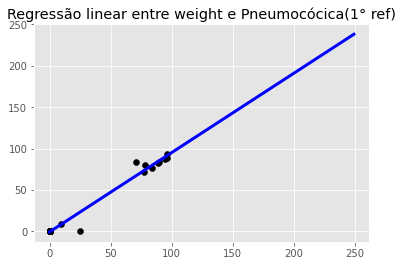

In [ ]:
print('Menor valor de Penta: ', df['Penta'].min())
print('Maior valor de Penta: ', df['Penta'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['Penta']).reshape(-1,1)
y=np.asarray(df['Pneumocócica(1° ref)']).reshape(-1,1)

regr.fit(x,y)
print(regr)
new_input=np.asarray(range(250)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['Penta'],df['Pneumocócica(1° ref)'],  color='black')
plt.title("Regressão linear entre weight e Pneumocócica(1° ref)")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

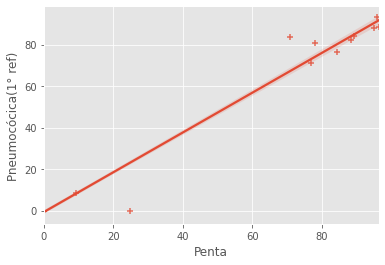

In [ ]:
import seaborn as sns
import pandas as pd

x = pd.Series(df['Penta'], name="Penta")
y=pd.Series(df['Pneumocócica(1° ref)'],name="Pneumocócica(1° ref)")
ax = sns.regplot(x=x, y=y, marker="+",ci=70)

# Hepatite B em crianças até 30 dias

Text(0, 0.5, 'Contagem')

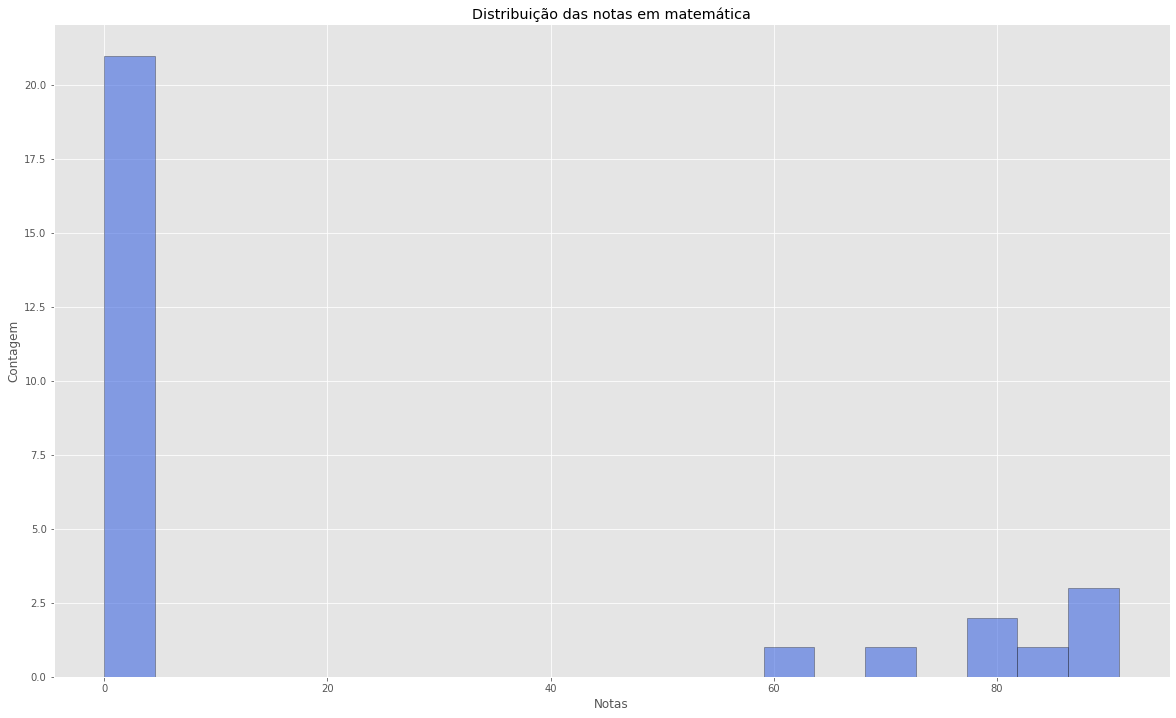

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["Hepatite B em crianças até 30 dias"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição das notas em matemática")
plt.xlabel("Notas")
plt.ylabel("Contagem")

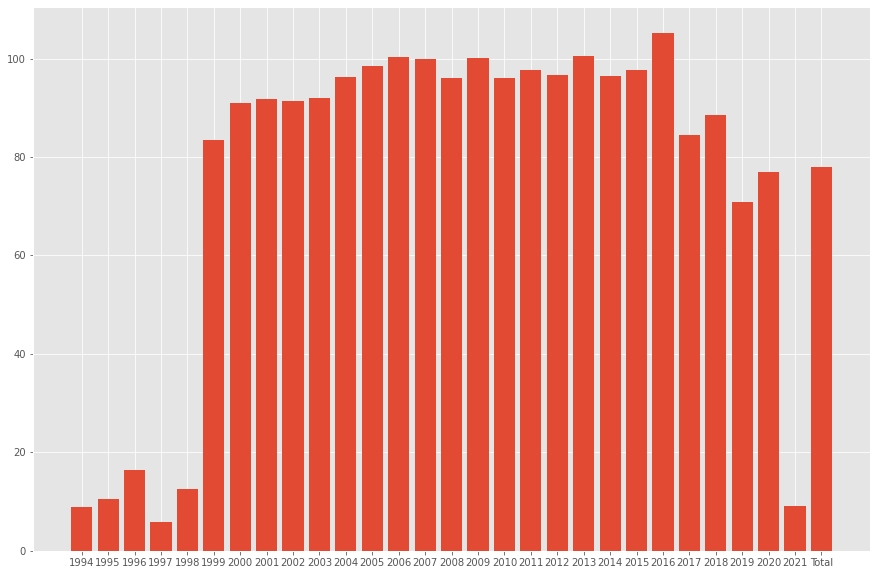

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(df['Ano'], df['Hepatite B'])
plt.show()

Text(0, 0.5, 'Contagem')

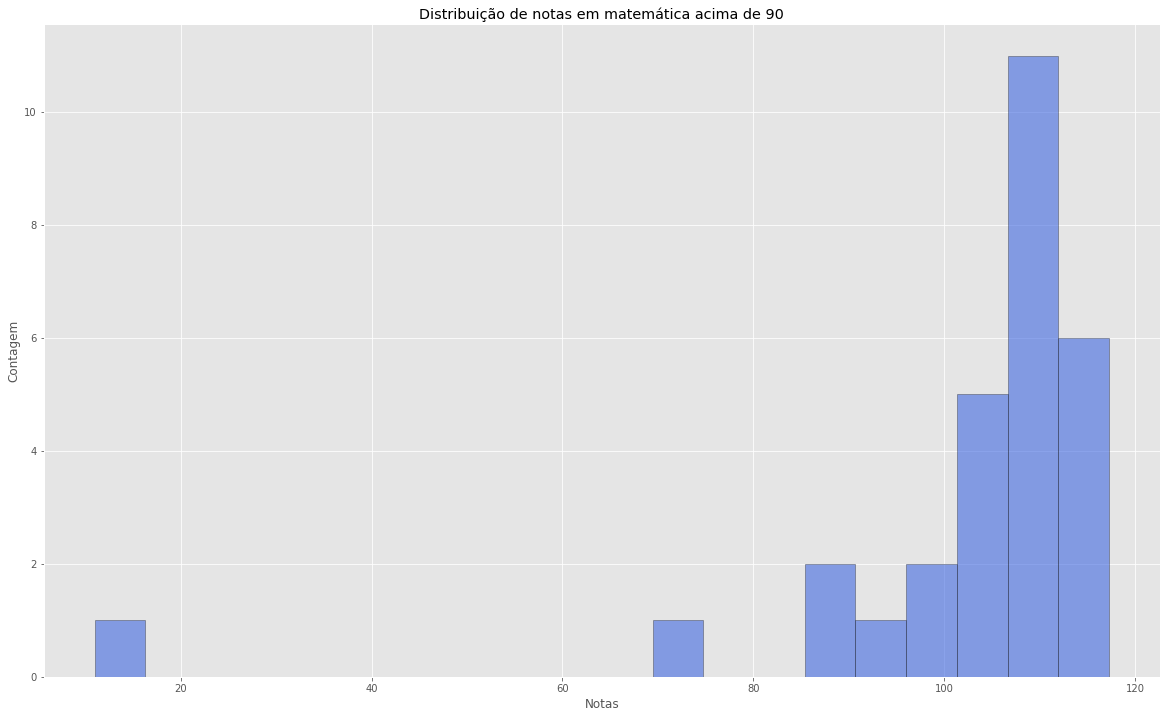

In [ ]:
plt.figure(figsize = (20, 12))
df[df["BCG"] > 10.0]["BCG"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição de notas em matemática acima de 90")
plt.xlabel("Notas")
plt.ylabel("Contagem")

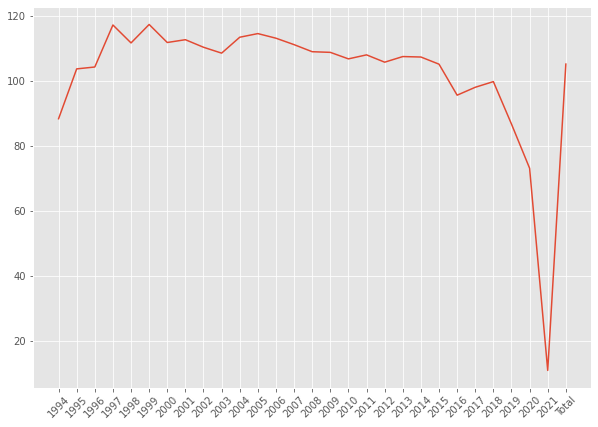

In [ ]:
plt.figure(figsize = (10, 7))
plt.xticks(rotation=45)
plt.plot(df['Ano'], df['BCG'])

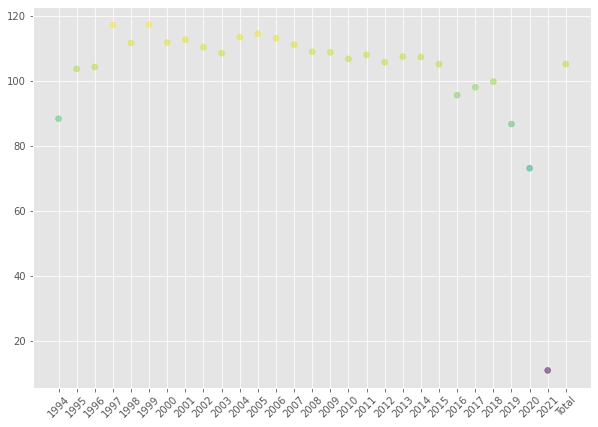

In [ ]:
plt.figure(figsize = (10, 7))
scatter_plot = plt.scatter(df['Ano'], df['BCG'], alpha=0.5, c=df['BCG'])
plt.xticks(rotation=45)
plt.show()

# Gráficos de dispersão

## Distribuição de Ano vs BCG

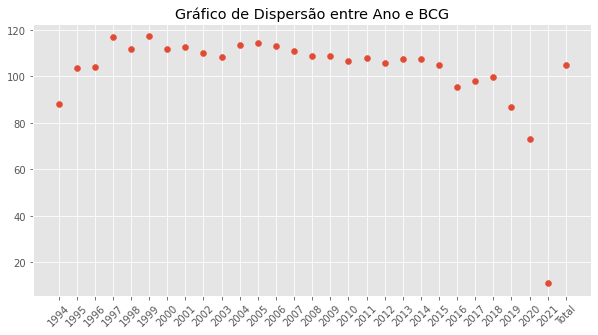

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(df['Ano'], df['BCG'])
plt.xticks(rotation=45)
plt.title('Gráfico de Dispersão entre Ano e BCG')
plt.show()

## Distribuição de Ano vs Hepatite B em crianças até 30 dias

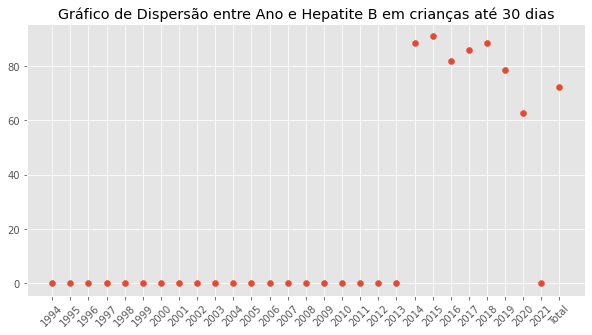

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(df['Ano'], df['Hepatite B em crianças até 30 dias'])
plt.xticks(rotation=45)
plt.title('Gráfico de Dispersão entre Ano e Hepatite B em crianças até 30 dias')
plt.show()

## Distribuição de Ano vs Hepatite B

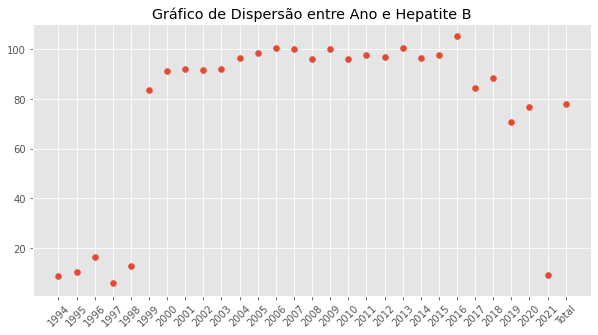

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(df['Ano'], df['Hepatite B'])
plt.xticks(rotation=45)
plt.title('Gráfico de Dispersão entre Ano e Hepatite B')
plt.show()

## Distribuição de Meningococo C vs Pneumocócica

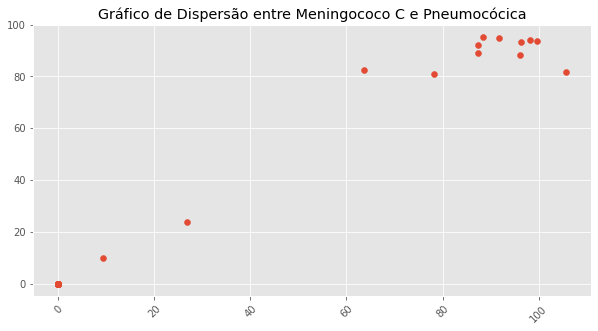

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(df['Meningococo C'], df['Pneumocócica'])
plt.xticks(rotation=45)
plt.title('Gráfico de Dispersão entre Meningococo C e Pneumocócica')
plt.show()

## Distribuição de Penta vs Pneumocócica

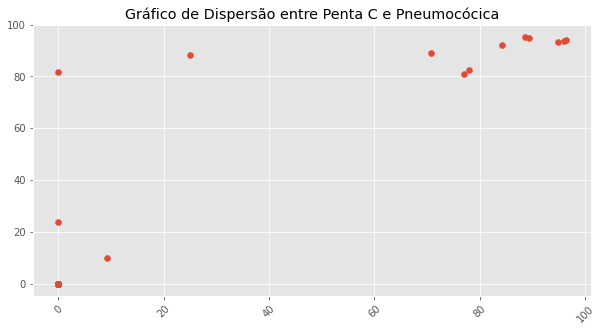

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(df['Penta'], df['Pneumocócica'])
plt.xticks(rotation=45)
plt.title('Gráfico de Dispersão entre Penta C e Pneumocócica')
plt.show()

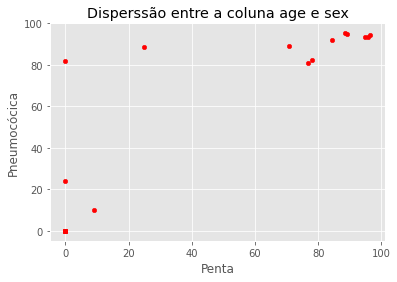

In [ ]:
df.plot(kind='scatter', x='Penta', y='Pneumocócica', title='Disperssão entre a coluna age e sex', color='red')

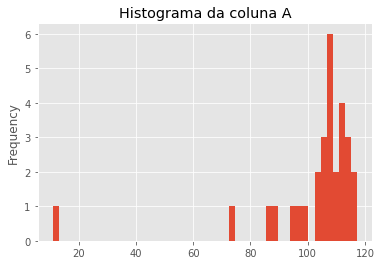

In [ ]:
df['BCG'].plot(kind='hist', bins=50, title='Histograma da coluna A')

In [ ]:
#df.plot(kind='hist',title='Histograma aninhado')
#df.plot()

In [ ]:
print('Média Ano: ', df['Ano'].isnull().sum())
print('Quantidade Ano: ', df['Ano'].isnull().count())

print('Média BCG: ',df['BCG'].isnull().sum())
print('Quantidade BCG: ', df['BCG'].isnull().count())

print('Média Penta: ', df['Penta'].isnull().sum())
print('Quantidade Penta: ',df['Penta'].isnull().count())

Média Ano:  0
Quantidade Ano:  29
Média BCG:  0
Quantidade BCG:  29
Média Penta:  0
Quantidade Penta:  29


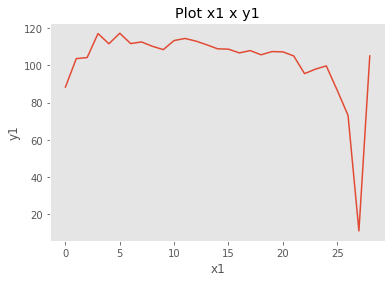

In [ ]:
plt.figure()
plt.title('Plot x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.plot(df['BCG'], label='BCG')
plt.grid()
plt.show()

In [ ]:
filtro  = df['BCG'] > 110
aplica = df[filtro]
aplica.head(40)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
3,1997,117.12,0.0,0.00,0.0,5.79,0.0,0.0,89.27,0.0,7.84,0.0,0.0,0.0,0.0,0.00,0.0,0.0,78.50,0.0,0.0,108.61,0.03,0.0,0.0,0.00,106.68,68.95
4,1998,111.61,0.0,0.00,0.0,12.63,0.0,0.0,95.30,0.0,18.49,0.0,0.0,0.0,0.0,0.00,0.0,0.0,92.97,0.0,0.0,95.26,0.84,0.0,0.0,0.00,104.36,70.65
5,1999,117.28,0.0,0.00,0.0,83.50,0.0,0.0,99.08,0.0,29.06,0.0,0.0,0.0,0.0,6692.10,0.0,0.0,94.46,0.0,0.0,99.31,5.09,0.0,0.0,0.00,100.06,86.57
6,2000,111.74,0.0,0.00,0.0,91.08,0.0,0.0,101.44,0.0,37.14,0.0,0.0,0.0,0.0,77.50,0.0,0.0,94.71,0.0,0.0,105.35,87.85,0.0,0.0,0.00,80.12,76.50
7,2001,112.60,0.0,0.00,0.0,91.88,0.0,0.0,102.83,0.0,40.24,0.0,0.0,0.0,0.0,88.43,0.0,0.0,97.45,0.0,0.0,103.85,93.10,0.0,0.0,0.00,83.86,79.85
8,2002,110.28,0.0,0.00,0.0,91.47,0.0,0.0,100.01,0.0,38.70,0.0,0.0,0.0,0.0,96.92,0.0,0.0,44.69,0.0,0.0,96.02,38.98,0.0,0.0,53.86,81.35,76.09
10,2004,113.36,0.0,0.00,0.0,96.26,0.0,0.0,104.30,0.0,38.29,0.0,0.0,0.0,0.0,110.93,0.0,0.0,102.41,0.0,0.0,0.00,0.00,0.0,0.0,102.30,81.72,82.79
11,2005,114.48,0.0,0.00,0.0,98.46,0.0,0.0,105.12,0.0,42.95,0.0,0.0,0.0,0.0,106.55,0.0,0.0,102.82,0.0,0.0,0.00,0.00,0.0,0.0,102.49,73.77,77.04
12,2006,113.06,0.0,46.52,0.0,100.30,0.0,0.0,105.25,0.0,46.17,0.0,0.0,0.0,0.0,105.35,0.0,0.0,103.50,0.0,0.0,0.00,0.00,0.0,0.0,103.31,73.47,76.12
13,2007,111.08,0.0,79.79,0.0,99.89,0.0,0.0,105.43,0.0,49.23,0.0,0.0,0.0,0.0,106.80,0.0,0.0,103.25,0.0,0.0,0.00,0.00,0.0,0.0,103.06,73.11,76.94


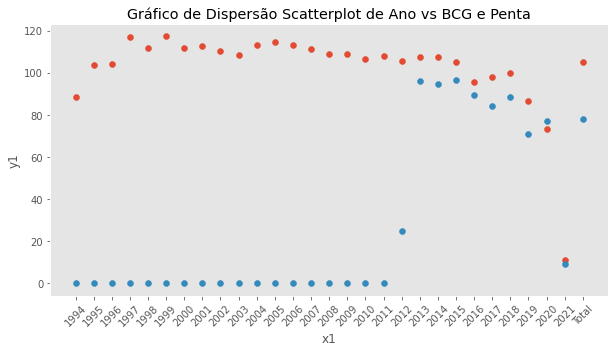

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Gráfico de Dispersão Scatterplot de Ano vs BCG e Penta')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(df['Ano'],df['BCG'])
plt.scatter(df['Ano'],df['Penta'])
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Dados estatísticos

In [ ]:
# media e desvio padrao de data1
print('média de data1: ', str(round(mean(df['Hepatite B']),2)))
print('desvio padrão de data1: ', str(round(std(df['Hepatite B']),2)))

média de data1:  75.64
desvio padrão de data1:  34.11


In [ ]:
# media e desvio padrao de data2
print('média de data2:' '', str(round(mean(df['BCG']),2)))
print('desvio padrão de data1:' '', str(round(std(df['BCG']),2)))

média de data2: 102.21
desvio padrão de data1: 19.67


In [ ]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print((total_missing/total_cells) * 100)

0.0


In [60]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_sudeste.csv")
new_df['Ano'] = pd.to_numeric(new_df['Ano'], errors='ignore')
new_df.query('Ano > 2019').head(40)

,Ano,1 Região Norte,2 Região Nordeste,3 Região Sudeste,4 Região Sul,5 Região Centro-Oeste,Total
26,2020,64.9,71.74,77.38,85.76,79.79,75.81


In [ ]:
new_df['Ano'] = pd.to_numeric(new_df['Ano'], errors='ignore')
new_df.query('Ano > 2019 & BCG > 60').head(10)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
26,2020,73.1,62.67,76.98,78.19,76.91,76.91,81.0,75.83,67.09,57.08,74.89,71.21,75.68,68.24,79.46,62.72,20.66,0.0,72.96,76.03,0.0,0.0,22.39,45.42,0.0,0.0,66.56


In [ ]:
df.groupby(by='BCG').size()

BCG
9.87      1
69.28     1
84.41     1
94.31     1
95.40     1
101.98    2
103.22    1
104.01    1
104.08    2
104.43    1
104.51    1
104.76    1
104.80    1
104.82    1
104.87    1
105.51    1
106.16    1
106.88    1
107.16    1
107.92    1
108.78    1
108.96    1
110.69    1
112.61    1
117.59    1
120.77    1
122.74    1
dtype: int64

In [ ]:
df.groupby(['BCG']).agg({'BCG': np.mean})

,BCG
BCG,
9.87,9.87
69.28,69.28
84.41,84.41
94.31,94.31
95.40,95.40
101.98,101.98
103.22,103.22
104.01,104.01
104.08,104.08


In [ ]:
df.isnull().sum()

Ano                                          0
BCG                                          0
Hepatite B em crianças até 30 dias           0
Rotavírus Humano                             0
Meningococo C                                0
Hepatite B                                   0
Penta                                        0
Pneumocócica                                 0
Poliomielite                                 0
Poliomielite 4 anos                          0
Febre Amarela                                0
Hepatite A                                   0
Pneumocócica(1° ref)                         0
Meningococo C (1° ref)                       0
Poliomielite(1° ref)                         0
Tríplice Viral  D1                           0
Tríplice Viral  D2                           0
Tetra Viral(SRC+VZ)                          0
DTP                                          0
DTP REF (4 e 6 anos)                         0
Tríplice Bacteriana(DTP)(1° ref)             0
Sarampo      

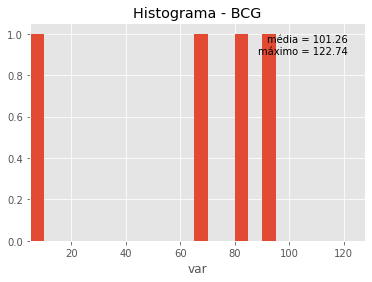

In [ ]:
#!/usr/bin/env python3.7.5
# -*- Coding: UTF-8 -*-
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Define functions
def histogram(type_hist, data, varname, place):
    """
    Plot histogram from given list values.
    Histogram types: fixed_bin_size or fixed_number_bins
    """
    title = 'Histograma - %s' %place
    figname = 'hist_%s.png' %place
    text = 'média = %.2f\nmáximo = %.2f' % (data.mean(), max(data))
    
    n_bins = 30
    bin_size = 5
    if type_hist == 'fixed_bin_size':
        bins = np.arange(0, 100, bin_size)
    elif type_hist == 'fixed_number_bins':
        bins = np.linspace(math.ceil(min(data)), math.floor(max(data)), n_bins)
    plt.xlim([min(data)-5, max(data)+5])
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(varname)
    #plt.ylabel('contagens')
    ax = plt.gca() # Get axis handle for text positioning
    plt.text(0.95, 0.95, text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
    plt.savefig(figname)    
    plt.show()
    #plt.close()

# Call histogram function
histogram('fixed_bin_size', df['BCG'], 'var', 'BCG')
#histogram('fixed_number_bins', df['Ano'], 'var', 'lugar')

In [ ]:
df.head(4)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,94.31,0.0,0.0,0.0,90.42,0.0,0.0,73.72,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.09,0.0,0.0,96.21,0.0,0.0,0.0,0.0,0.00,55.22
1,1995,112.61,0.0,0.0,0.0,5.36,0.0,0.0,94.11,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.83,0.0,0.0,93.85,0.0,0.0,0.0,0.0,7.07,46.43
2,1996,107.16,0.0,0.0,0.0,5.39,0.0,0.0,93.87,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.67,0.0,0.0,91.28,0.0,0.0,0.0,0.0,7.28,44.66
3,1997,120.77,0.0,0.0,0.0,1.62,0.0,0.0,96.64,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.76,0.0,0.0,120.73,0.0,0.0,0.0,0.0,104.74,70.58


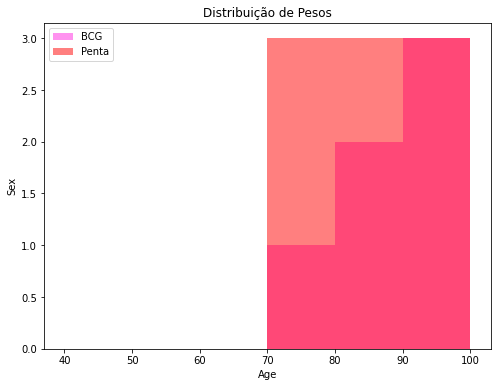

In [20]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv")

"""
Criando um histograma comparando os dados
"""
BCG = df['BCG']
Meningococo = df['Meningococo C']
Hepatite = df['Hepatite B']
Penta = df['Penta']

plt.figure(figsize=(8, 6))
plt.title('Distribuição de Pesos')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.hist(BCG, bins=range(40, 110,10), alpha=0.5, label='BCG', color='#FF26E1')
#plt.hist(Meningococo, bins=range(40, 110,10), alpha=0.5, label='Meningococo C', color='#2DB200')
#plt.hist(Hepatite, bins=range(40, 110,10), alpha=0.5, label='Hepatite B', color='blue')
plt.hist(Penta, bins=range(40, 110,10), alpha=0.5, label='Penta', color='red')
plt.legend(loc='upper left')
#plt.savefig('imagens/peso-histograma-mas-x-fem.png')
#plt.close()
plt.show()

In [21]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv")

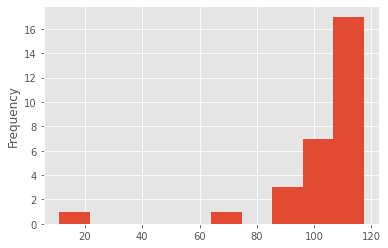

In [ ]:
df['BCG'].plot(kind='hist')

Preencher a coluna "Age" com a média das idades

# Ordenando o dataset (BCG)

In [ ]:
df.sort_values(by='BCG').head()

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
27,2021,10.97,0.00,10.00,9.19,9.17,9.17,10.20,9.08,0.00,8.50,8.20,8.36,8.52,7.37,9.29,7.13,1.00,0.00,0.00,7.57,0.00,0.0,0.00,0.00,0.00,0.00,8.60
26,2020,73.10,62.67,76.98,78.19,76.91,76.91,81.00,75.83,67.09,57.08,74.89,71.21,75.68,68.24,79.46,62.72,20.66,0.00,72.96,76.03,0.00,0.0,22.39,45.42,0.00,0.00,66.56
25,2019,86.67,78.57,85.40,87.41,70.77,70.76,89.07,84.19,68.45,62.41,85.02,83.47,85.78,74.62,93.12,81.55,34.24,0.00,53.74,57.08,0.00,0.0,45.02,63.23,0.00,0.00,73.44
0,1994,88.31,0.00,0.00,0.00,8.85,0.00,0.00,58.24,0.00,5.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64.76,0.00,0.00,71.37,0.0,0.00,0.00,0.00,4.69,38.27
22,2016,95.55,81.75,88.98,91.68,105.19,89.27,95.00,84.43,0.00,44.59,71.58,84.10,93.86,74.36,95.41,76.71,79.04,89.53,2.73,64.28,0.00,0.0,31.53,33.81,5.21,16.44,50.44


# Leitura de Dados Geral

In [ ]:
#!git clone https://github.com/JeanKusanagi/E1--Vaccine-immunology

In [22]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv")

In [ ]:
df.head(1)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,88.31,0.0,0.0,0.0,8.85,0.0,0.0,58.24,0.0,5.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.76,0.0,0.0,71.37,0.0,0.0,0.0,0.0,4.69,38.27


In [ ]:
bases_sudeste = [
        'ano_imuno_sudeste.csv',
        'ano_imuno_sudeste_capitais.csv',
        'ano_imuno_sudeste_extrprobeza=n.csv',
        'ano_imuno_sudeste_extrprobeza=s.csv'
]
  
new_sudeste=BuscaDadosPorAno('2021', bases_sudeste)
new_sudeste

,Local,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Poliomielite(1° ref),Meningococo C (1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado
0,ano_imuno_sudeste.csv,9.87,0.0,12.73,11.81,12.20,12.20,12.89,12.11,0.0,12.40,12.14,11.44,11.97,13.27,11.22,0.43,0.0,0.0,11.48,0.0,0.0,0.0,0.0,0.0,0.0
1,ano_imuno_sudeste_capitais.csv,13.57,0.0,29.35,28.36,29.60,29.60,29.73,29.57,0.0,30.67,29.46,28.12,29.12,31.66,27.68,0.35,0.0,0.0,27.89,0.0,0.0,0.0,0.0,0.0,0.0
2,ano_imuno_sudeste_extrprobeza=n.csv,9.87,0.0,12.73,11.81,12.20,12.20,12.89,12.11,0.0,12.40,12.14,11.44,11.97,13.27,11.22,0.43,0.0,0.0,11.48,0.0,0.0,0.0,0.0,0.0,0.0
3,ano_imuno_sudeste_extrprobeza=s.csv,12.06,0.0,9.10,7.74,7.73,7.73,9.42,7.64,0.0,7.60,7.33,6.50,7.72,8.81,6.31,1.37,0.0,0.0,7.18,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bases_regioes = [
        'ano_imuno_nordeste.csv',
        'ano_imuno_norte.csv',
        'ano_imuno_sudeste.csv'
]
  
new_regioes=BuscaDadosPorAno('2021', bases_regioes)
new_regioes

,Local,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Poliomielite(1° ref),Meningococo C (1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado
0,ano_imuno_nordeste.csv,12.72,0.0,9.56,8.67,8.60,8.60,10.01,8.46,0.0,6.21,6.45,5.24,7.19,7.78,5.35,0.66,0.0,0.0,5.70,0.0,0.0,0.0,0.0,0.0,0.0
1,ano_imuno_norte.csv,9.52,0.0,8.70,7.96,6.97,6.97,8.48,6.97,0.0,5.90,5.47,4.68,5.98,6.17,2.96,0.32,0.0,0.0,4.67,0.0,0.0,0.0,0.0,0.0,0.0
2,ano_imuno_sudeste.csv,9.87,0.0,12.73,11.81,12.20,12.20,12.89,12.11,0.0,12.40,12.14,11.44,11.97,13.27,11.22,0.43,0.0,0.0,11.48,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bases_capitais = [
        'ano_imuno_br_capitais.csv',
        'ano_imuno_centrooeste_capitais.csv',
        'ano_imuno_nordeste_capitais.csv',
        'ano_imuno_norte_capitais.csv',
        'ano_imuno_sudeste_capitais.csv',
        'ano_imuno_sul_capitais.csv'
]
  
new_capitais=BuscaDadosPorAno('2021', bases_capitais)
new_capitais

,Local,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Poliomielite(1° ref),Meningococo C (1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado
0,ano_imuno_br_capitais.csv,11.32,0.0,16.18,15.27,15.46,15.46,16.39,15.36,0.0,14.90,14.68,13.80,14.93,16.12,13.35,0.48,0.0,0.0,13.76,0.0,0.0,0.0,0.0,0.0,0.0
1,ano_imuno_centrooeste_capitais.csv,10.45,0.0,6.15,4.65,4.54,4.54,6.29,4.47,0.0,4.66,4.23,3.99,4.14,4.71,3.19,1.20,0.0,0.0,3.94,0.0,0.0,0.0,0.0,0.0,0.0
2,ano_imuno_nordeste_capitais.csv,10.08,0.0,9.19,8.18,7.99,7.99,9.65,7.80,0.0,3.47,5.91,4.92,7.10,7.00,4.68,0.06,0.0,0.0,5.25,0.0,0.0,0.0,0.0,0.0,0.0
3,ano_imuno_norte_capitais.csv,1.87,0.0,4.46,4.10,3.49,3.49,3.93,3.30,0.0,3.04,2.66,2.43,3.05,3.54,1.71,0.03,0.0,0.0,2.24,0.0,0.0,0.0,0.0,0.0,0.0
4,ano_imuno_sudeste_capitais.csv,13.57,0.0,29.35,28.36,29.60,29.60,29.73,29.57,0.0,30.67,29.46,28.12,29.12,31.66,27.68,0.35,0.0,0.0,27.89,0.0,0.0,0.0,0.0,0.0,0.0
5,ano_imuno_sul_capitais.csv,20.45,0.0,6.88,4.56,4.36,4.36,6.91,4.29,0.0,4.75,3.68,3.38,4.45,4.88,3.40,1.38,0.0,0.0,3.46,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


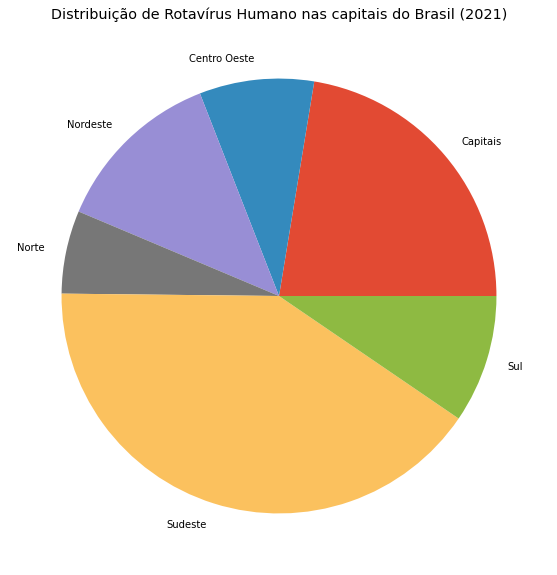

In [ ]:
rotavirus = pd.DataFrame()
rotavirus["Rotavírus Humano"] = pd.to_numeric(new_capitais["Rotavírus Humano"])

labels = ['Capitais', 'Centro Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

plt.style.use("ggplot")
plt.figure(figsize = (10, 10))
plt.pie(rotavirus, labels=labels)
plt.title("Distribuição de Rotavírus Humano nas capitais do Brasil (2021)")
plt.show()

In [ ]:
rotavirus

,Rotavírus Humano
0,16.18
1,6.15
2,9.19
3,4.46
4,29.35
5,6.88


In [ ]:
new_capitais["Rotavírus Humano"]

0    16.18
1     6.15
2     9.19
3     4.46
4    29.35
5     6.88
Name: Rotavírus Humano, dtype: float64

In [ ]:
resultados = []
for index, row in df.iterrows():
  if row['Ano'] == '2000':
    print(row['Ano'], row['BCG'])
    resultados.append(row['BCG'])
print(resultados)

2000 111.74
[111.74]


In [ ]:
for index, row in df.iterrows():
  if row['Ano'] == '2000':
    print(row['Ano'], row['BCG'])

2000 111.74


In [ ]:
for row in df['Ano']:
  #print(row)
  #print(tb_BCG[row].item)
  if row == '1999':
    print(df['BCG'])

0      88.31
1     103.63
2     104.21
3     117.12
4     111.61
5     117.28
6     111.74
7     112.60
8     110.28
9     108.47
10    113.36
11    114.48
12    113.06
13    111.08
14    108.91
15    108.71
16    106.71
17    107.94
18    105.69
19    107.42
20    107.28
21    105.08
22     95.55
23     97.98
24     99.72
25     86.67
26     73.10
27     10.97
28    105.11
Name: BCG, dtype: float64


In [ ]:
for index, row in df.iterrows():
  if row['Ano'] == '2000':
    print(row['Ano'], row['BCG'])

2000 111.74


In [ ]:
for i in df.index: 
     print("Ano de "+ df["Ano"][i]+ " com BCG igual a "+str(df["BCG"][i]))

Ano de 1994 com BCG igual a 88.31
Ano de 1995 com BCG igual a 103.63
Ano de 1996 com BCG igual a 104.21
Ano de 1997 com BCG igual a 117.12
Ano de 1998 com BCG igual a 111.61
Ano de 1999 com BCG igual a 117.28
Ano de 2000 com BCG igual a 111.74
Ano de 2001 com BCG igual a 112.6
Ano de 2002 com BCG igual a 110.28
Ano de 2003 com BCG igual a 108.47
Ano de 2004 com BCG igual a 113.36
Ano de 2005 com BCG igual a 114.48
Ano de 2006 com BCG igual a 113.06
Ano de 2007 com BCG igual a 111.08
Ano de 2008 com BCG igual a 108.91
Ano de 2009 com BCG igual a 108.71
Ano de 2010 com BCG igual a 106.71
Ano de 2011 com BCG igual a 107.94
Ano de 2012 com BCG igual a 105.69
Ano de 2013 com BCG igual a 107.42
Ano de 2014 com BCG igual a 107.28
Ano de 2015 com BCG igual a 105.08
Ano de 2016 com BCG igual a 95.55
Ano de 2017 com BCG igual a 97.98
Ano de 2018 com BCG igual a 99.72
Ano de 2019 com BCG igual a 86.67
Ano de 2020 com BCG igual a 73.1
Ano de 2021 com BCG igual a 10.97
Ano de Total com BCG igual a 

(0.0, 110.0)

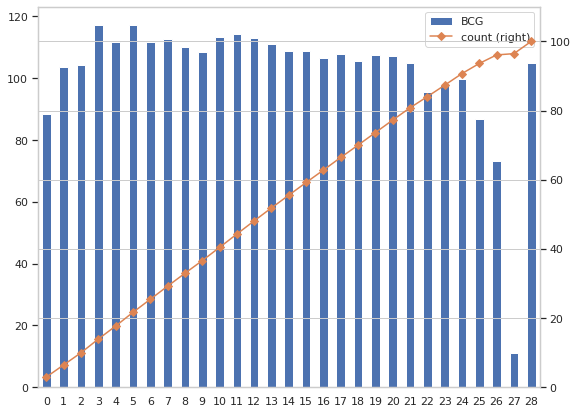

In [ ]:
df['count'] = 100 *df['BCG'].cumsum() / df['BCG'].sum()
fig, axes = plt.subplots(figsize = (9, 7))
ax1 = df.plot(use_index=True, y='BCG',  kind='bar', ax=axes)
ax2 = df.plot(use_index=True, y='count', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax2.set_ylim([0,110])

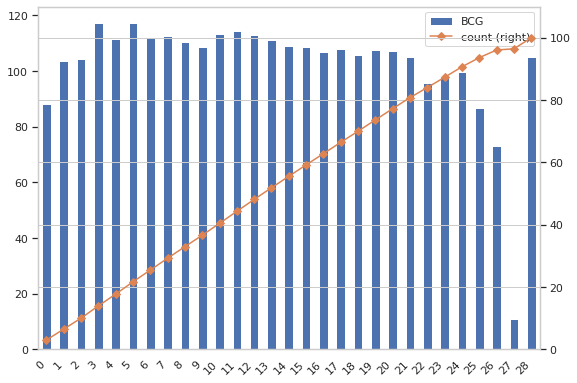

In [ ]:
new_capitais['count'] = 100 *new_capitais['BCG'].cumsum() / new_capitais['BCG'].sum()
fig, axes = plt.subplots(figsize = (9, 7))
ax1 = df.plot(use_index=True, y='BCG',  kind='bar', ax=axes)
ax2 = df.plot(use_index=True, y='count', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax2.set_ylim([0,110])
fig.autofmt_xdate(rotation=45)

# Tratando erros

*   Todos as tabelas estão preenchidos com valores iguais a 0 ou maiores que 0.

In [ ]:
s = NovoDataSet(df)

Iterador:  28


In [ ]:
s['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')
s

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994.0,88.31,0.00,0.00,0.00,8.85,0.00,0.00,58.24,0.00,5.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64.76,0.00,0.00,71.37,0.00,0.00,0.00,0.00,4.69,38.27
1,1995.0,103.63,0.00,0.00,0.00,10.50,0.00,0.00,77.83,0.00,4.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.54,0.00,0.00,86.86,0.00,0.00,0.00,0.00,23.61,45.71
2,1996.0,104.21,0.00,0.00,0.00,16.50,0.00,0.00,80.86,0.00,5.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.25,0.00,0.00,80.40,0.01,0.00,0.00,0.00,42.10,50.01
3,1997.0,117.12,0.00,0.00,0.00,5.79,0.00,0.00,89.27,0.00,7.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.50,0.00,0.00,108.61,0.03,0.00,0.00,0.00,106.68,68.95
4,1998.0,111.61,0.00,0.00,0.00,12.63,0.00,0.00,95.30,0.00,18.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.97,0.00,0.00,95.26,0.84,0.00,0.00,0.00,104.36,70.65
5,1999.0,117.28,0.00,0.00,0.00,83.50,0.00,0.00,99.08,0.00,29.06,0.00,0.00,0.00,0.00,6692.10,0.00,0.00,94.46,0.00,0.00,99.31,5.09,0.00,0.00,0.00,100.06,86.57
6,2000.0,111.74,0.00,0.00,0.00,91.08,0.00,0.00,101.44,0.00,37.14,0.00,0.00,0.00,0.00,77.50,0.00,0.00,94.71,0.00,0.00,105.35,87.85,0.00,0.00,0.00,80.12,76.50
7,2001.0,112.60,0.00,0.00,0.00,91.88,0.00,0.00,102.83,0.00,40.24,0.00,0.00,0.00,0.00,88.43,0.00,0.00,97.45,0.00,0.00,103.85,93.10,0.00,0.00,0.00,83.86,79.85
8,2002.0,110.28,0.00,0.00,0.00,91.47,0.00,0.00,100.01,0.00,38.70,0.00,0.00,0.00,0.00,96.92,0.00,0.00,44.69,0.00,0.00,96.02,38.98,0.00,0.00,53.86,81.35,76.09
9,2003.0,108.47,0.00,0.00,0.00,92.00,0.00,0.00,100.48,0.00,34.68,0.00,0.00,0.00,0.00,112.95,0.00,0.00,1.41,0.00,0.00,4.06,1.72,0.00,0.00,97.47,83.19,72.97


In [ ]:
s['Ano'] = pd.to_numeric(df['Ano'], errors='ignore')
s

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,88.31,0.00,0.00,0.00,8.85,0.00,0.00,58.24,0.00,5.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64.76,0.00,0.00,71.37,0.00,0.00,0.00,0.00,4.69,38.27
1,1995,103.63,0.00,0.00,0.00,10.50,0.00,0.00,77.83,0.00,4.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.54,0.00,0.00,86.86,0.00,0.00,0.00,0.00,23.61,45.71
2,1996,104.21,0.00,0.00,0.00,16.50,0.00,0.00,80.86,0.00,5.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.25,0.00,0.00,80.40,0.01,0.00,0.00,0.00,42.10,50.01
3,1997,117.12,0.00,0.00,0.00,5.79,0.00,0.00,89.27,0.00,7.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.50,0.00,0.00,108.61,0.03,0.00,0.00,0.00,106.68,68.95
4,1998,111.61,0.00,0.00,0.00,12.63,0.00,0.00,95.30,0.00,18.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.97,0.00,0.00,95.26,0.84,0.00,0.00,0.00,104.36,70.65
5,1999,117.28,0.00,0.00,0.00,83.50,0.00,0.00,99.08,0.00,29.06,0.00,0.00,0.00,0.00,6692.10,0.00,0.00,94.46,0.00,0.00,99.31,5.09,0.00,0.00,0.00,100.06,86.57
6,2000,111.74,0.00,0.00,0.00,91.08,0.00,0.00,101.44,0.00,37.14,0.00,0.00,0.00,0.00,77.50,0.00,0.00,94.71,0.00,0.00,105.35,87.85,0.00,0.00,0.00,80.12,76.50
7,2001,112.60,0.00,0.00,0.00,91.88,0.00,0.00,102.83,0.00,40.24,0.00,0.00,0.00,0.00,88.43,0.00,0.00,97.45,0.00,0.00,103.85,93.10,0.00,0.00,0.00,83.86,79.85
8,2002,110.28,0.00,0.00,0.00,91.47,0.00,0.00,100.01,0.00,38.70,0.00,0.00,0.00,0.00,96.92,0.00,0.00,44.69,0.00,0.00,96.02,38.98,0.00,0.00,53.86,81.35,76.09
9,2003,108.47,0.00,0.00,0.00,92.00,0.00,0.00,100.48,0.00,34.68,0.00,0.00,0.00,0.00,112.95,0.00,0.00,1.41,0.00,0.00,4.06,1.72,0.00,0.00,97.47,83.19,72.97


In [ ]:
s['Ano'] = pd.to_numeric(new_df['Ano'])
s.query('Ano > 2019 & BCG > 60').head(10)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
26,2020,73.1,62.67,76.98,78.19,76.91,76.91,81.0,75.83,67.09,57.08,74.89,71.21,75.68,68.24,79.46,62.72,20.66,0.0,72.96,76.03,0.0,0.0,22.39,45.42,0.0,0.0,66.56


# Gráficos Exemplos

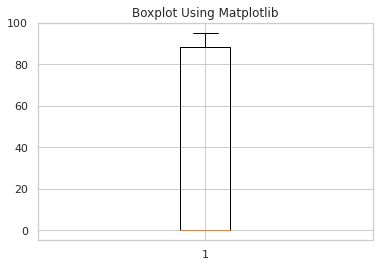

In [ ]:
#plt.boxplot(df['Rotavírus Humano'])
#plt.boxplot(df['Penta'])
plt.boxplot(df['Pneumocócica'])
plt.title("Boxplot Using Matplotlib")
plt.show()

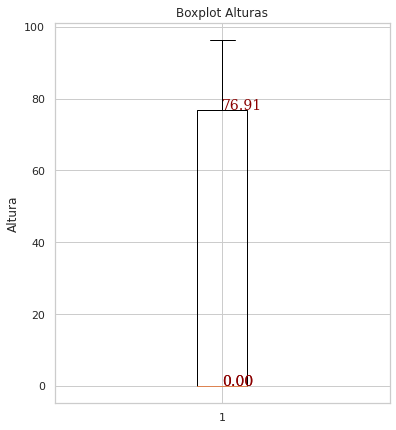

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

alturas = df['Penta']
alt_descri = alturas.describe()

#with open('altura-descricao.txt', 'w') as f:
#    alt_descri.to_string(f)

q1 = alt_descri['25%']
mediana = alt_descri['50%']
q2 = alt_descri['75%']

s_q1 = "{0:.2f}".format(q1)
s_mediana = "{0:.2f}".format(mediana)
s_q2 = "{0:.2f}".format(q2)

font_1 = {'family': 'serif', 'color': 'darkred', 'size':'14'}

plt.figure(figsize=(6, 7))
plt.boxplot(alturas)
plt.title('Boxplot Alturas')
plt.ylabel('Altura')
plt.text(1, q1, s_q1, fontdict=font_1)
plt.text(1, mediana, s_mediana, fontdict=font_1)
plt.text(1, q2, s_q2, fontdict=font_1)
#plt.savefig('alturas-boxplot.png')
#plt.close()
plt.show()

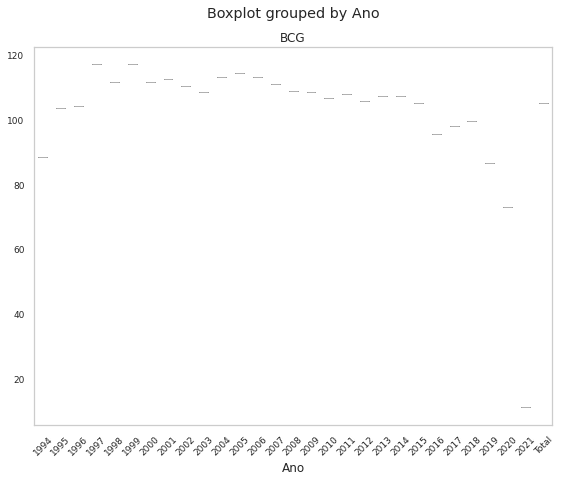

In [ ]:
boxplot = df.boxplot(column=['BCG'],by="Ano",figsize=(9,7),grid=False,rot=45,fontsize=9)
boxplot.plot()
plt.show()

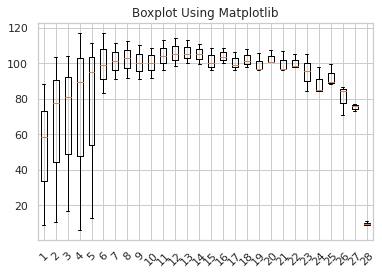

In [ ]:
r = pd.DataFrame()
r['A'] = s['BCG']
r['B'] = s['Hepatite B']
r['C'] = s['Poliomielite']

plt.boxplot(r)
plt.title("Boxplot Using Matplotlib")
plt.xticks(rotation=45)
plt.show()

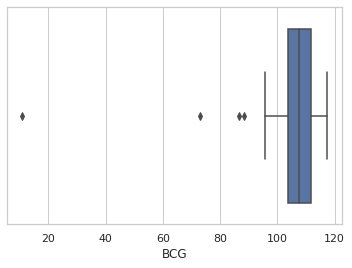

In [ ]:
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["BCG"])

# Regressão

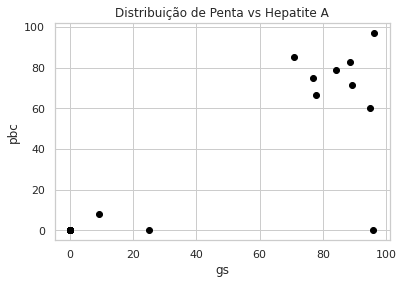

In [ ]:
plt.scatter(df['Penta'],df['Hepatite A'],  color='black')
plt.title("Distribuição de Penta vs Hepatite A")
plt.xlabel("gs")
plt.ylabel("pbc")
plt.show()

Menor valor de pbc:  0.0
Maior valor de pbc:  97.07
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


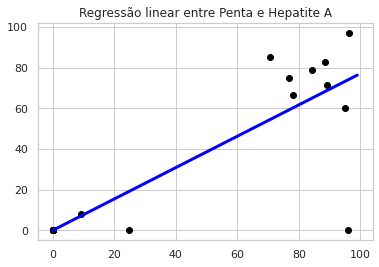

In [ ]:
print('Menor valor de pbc: ', df['Hepatite A'].min())
print('Maior valor de pbc: ', df['Hepatite A'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['Penta']).reshape(-1,1)
y=np.asarray(df['Hepatite A']).reshape(-1,1)

regr.fit(x,y)
print(regr)
new_input=np.asarray(range(100)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['Penta'], df['Hepatite A'], color='black')
plt.title("Regressão linear entre Penta e Hepatite A")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

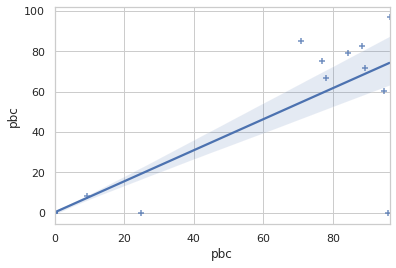

In [ ]:
import seaborn as sns
import pandas as pd

x = pd.Series(df['Penta'], name="pbc")
y = pd.Series(df['Hepatite A'], name="pbc")
ax = sns.regplot(x=x, y=y, marker="+",ci=70)

b0: 	[0.09818087]
b1: 	[0.76948718]


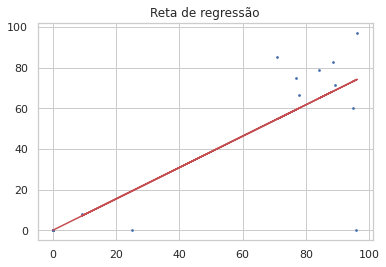

In [ ]:
# extrair coeficientes
slope = regr.coef_
intercept = regr.intercept_

# imprimir os valores encontrados para os parâmetros
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

x=np.asarray(df['Penta']).reshape(-1,1)
y=np.asarray(df['Hepatite A']).reshape(-1,1)

# plotar pontos e retas com parâmetros otimizados
plt.scatter(x, y, s=3)
plt.plot(x, (x * slope + intercept), color='r')

plt.title('Reta de regressão')
plt.show()

In [ ]:
x.shape, y.shape

((29, 1), (29, 1))

In [ ]:
bases_sudeste = [
        'ano_imuno_sudeste.csv',
        'ano_imuno_sudeste_capitais.csv',
        'ano_imuno_sudeste_extrprobeza=n.csv',
        'ano_imuno_sudeste_extrprobeza=s.csv'
]
  
new_sudeste=BuscaDadosPorAno('2021', bases_sudeste)
new_sudeste

,Local,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Poliomielite(1° ref),Meningococo C (1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado
0,ano_imuno_sudeste.csv,9.87,0.0,12.73,11.81,12.20,12.20,12.89,12.11,0.0,12.40,12.14,11.44,11.97,13.27,11.22,0.43,0.0,0.0,11.48,0.0,0.0,0.0,0.0,0.0,0.0
1,ano_imuno_sudeste_capitais.csv,13.57,0.0,29.35,28.36,29.60,29.60,29.73,29.57,0.0,30.67,29.46,28.12,29.12,31.66,27.68,0.35,0.0,0.0,27.89,0.0,0.0,0.0,0.0,0.0,0.0
2,ano_imuno_sudeste_extrprobeza=n.csv,9.87,0.0,12.73,11.81,12.20,12.20,12.89,12.11,0.0,12.40,12.14,11.44,11.97,13.27,11.22,0.43,0.0,0.0,11.48,0.0,0.0,0.0,0.0,0.0,0.0
3,ano_imuno_sudeste_extrprobeza=s.csv,12.06,0.0,9.10,7.74,7.73,7.73,9.42,7.64,0.0,7.60,7.33,6.50,7.72,8.81,6.31,1.37,0.0,0.0,7.18,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_df = NovoDataSet(df)
#new_df.head(40)

Iterador:  28


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

#x=np.asarray(df['Penta']).reshape(-1,1)
#y=np.asarray(df['Febre Amarela']).reshape(-1,1)
x = new_df.iloc[:, :-1].values#.reshape(-1,1)
y = new_df.iloc[:, 1].values#.reshape(-1,1)

regr.fit(x,y)
print(regr)
#new_input=np.asarray(range(100)).reshape(-1,1)
#predicted_output=regr.predict(new_input)

#plt.scatter(df['Penta'], df['Febre Amarela'], color='black')
#plt.title("Regressão linear entre Penta e Febre Amarela")
#plt.plot(new_input, predicted_output, color='blue', linewidth=3)
#plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
new_df.head(1)

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,88.31,0.0,0.0,0.0,8.85,0.0,0.0,58.24,0.0,5.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.76,0.0,0.0,71.37,0.0,0.0,0.0,0.0,4.69,38.27


In [ ]:
variaveis = ['BCG','Hepatite B em crianças até 30 dias','Rotavírus Humano','Meningococo C','Hepatite B','Penta','Pneumocócica','Poliomielite','Poliomielite 4 anos','Febre Amarela','Hepatite A','Pneumocócica(1° ref)','Meningococo C (1° ref)','Poliomielite(1° ref)','Tríplice Viral  D1','Tríplice Viral  D2','Tetra Viral(SRC+VZ)','DTP','DTP REF (4 e 6 anos)','Tríplice Bacteriana(DTP)(1° ref)','Sarampo','Haemophilus influenzae b','Dupla adulto e tríplice acelular gestante','dTpa gestante','Tetravalente (DTP/Hib) (TETRA)','Ignorado']#'Total'

x = new_df[variaveis].fillna(-1)
y = new_df['Ano']

#new_input1 = [[2020],[77.33],[72.99],[78.97],[79.79],[81.98],[81.98],[83.01],[77.21],[84.23],[68.53],[76.52],[75.85],[74.4],[71.03],[73.28],[62.73],[46.47],[0],[86.61],[79.65],[0],[0],[12.92],[51.84],[0],[0],[71]]
#new_input2 = [2020,77.33,72.99,78.97,79.79,81.98,81.98,83.01,77.21,84.23,68.53,76.52,75.85,74.4,71.03,73.28,62.73,46.47,0,86.61,79.65,0,0,12.92,51.84,0,0,71]
#new_input = [77.33,72.99,78.97,79.79,81.98,81.98,83.01,77.21,84.23,68.53,76.52,75.85,74.4,71.03,73.28,62.73,46.47,0,86.61,79.65,0,0,12.92,51.84,0,0,71]
new_input = [[77.33],[72.99],[78.97],[79.79],[81.98],[81.98],[83.01],[77.21],[84.23],[68.53],[76.52],[75.85],[74.4],[71.03],[73.28],[62.73],[46.47],[0],[86.61],[79.65],[0],[0],[12.92],[51.84],[0],[0],[0]]

In [ ]:
from sklearn.model_selection import train_test_split

# Create linear regression object
regr = linear_model.LinearRegression()

#x=np.asarray(df['Penta']).reshape(-1,1)
#y=np.asarray(df['Febre Amarela']).reshape(-1,1)
#x = new_df.iloc[:, :-1].values#.reshape(-1,1)
#y = new_df.iloc[:, 1].values#.reshape(-1,1)
x = new_df.drop('Ano', axis=1)
y = new_df['Ano']

x_train, x_test, y_train, y_test = train_test_split(x, y)

regr.fit(x_train, y_train)
print(regr)
#new_input=np.asarray(range(100)).reshape(-1,1)
#predicted_output=regr.predict(new_input)

new_input=np.asarray(new_input).reshape(1,-1)
print(len(new_input))
predicted_output=regr.predict(new_input)
print('Ano preditado: ', predicted_output)

#plt.scatter(df['Penta'], df['Febre Amarela'], color='black')
#plt.title("Regressão linear entre Penta e Febre Amarela")
#plt.plot(new_input, predicted_output, color='blue', linewidth=3)
#plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
1
Ano preditado:  [2034.42869965]


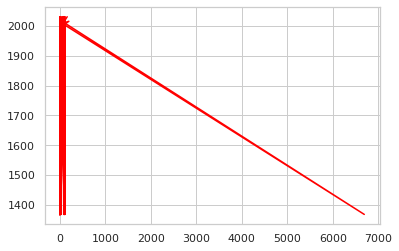

In [ ]:
variaveis = ['BCG','Hepatite B em crianças até 30 dias','Rotavírus Humano','Meningococo C','Hepatite B','Penta','Pneumocócica','Poliomielite','Poliomielite 4 anos','Febre Amarela','Hepatite A','Pneumocócica(1° ref)','Meningococo C (1° ref)','Poliomielite(1° ref)','Tríplice Viral  D1','Tríplice Viral  D2','Tetra Viral(SRC+VZ)','DTP','DTP REF (4 e 6 anos)','Tríplice Bacteriana(DTP)(1° ref)','Sarampo','Haemophilus influenzae b','Dupla adulto e tríplice acelular gestante','dTpa gestante','Tetravalente (DTP/Hib) (TETRA)','Ignorado']#'Total'

X = new_df[variaveis].fillna(-1)
y = new_df['Ano']

# divide o dataset em test e treinamento
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

import matplotlib.pyplot as plt

#Coloca os pontos em um gráfico de scatter
#plt.scatter(X_treinamento, y_treinamento)

# cria a reta
plt.plot(X_treinamento, regressor.predict(X_treinamento), color = 'red')

# realiza previsões
previsoes = regressor.predict(X_teste)

#resultado = abs(y_teste - previsoes)
#resultado.mean()

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)

#plt.scatter(X_teste, y_teste)
plt.plot(X_teste, regressor.predict(X_teste), color = 'red')

regressor.score(X_teste, y_teste)

plt.show()

In [ ]:
X_treinamento.shape, y_treinamento.shape

((19, 26), (19,))

In [23]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_bcg.csv")
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_região_D1.csv")
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_região_dtp.csv")
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_febreamarela.csv")
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_hepB.csv")
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_polio.csv")

In [ ]:
df

,Ano,1 Região Norte,2 Região Nordeste,3 Região Sudeste,4 Região Sul,5 Região Centro-Oeste,Total
0,1994,35.07,64.93,73.72,87.00,41.33,58.24
1,1995,50.83,70.36,94.11,86.29,58.92,77.83
2,1996,61.96,73.00,93.87,85.23,80.57,80.86
3,1997,69.68,84.65,96.64,94.62,85.90,89.27
4,1998,88.22,87.37,103.90,91.35,101.91,95.30
5,1999,88.44,93.87,106.81,93.60,105.78,99.08
6,2000,105.90,97.15,102.07,101.27,110.65,101.44
7,2001,105.86,103.72,100.79,102.80,105.71,102.83
8,2002,107.77,99.05,98.42,98.42,104.21,100.01
9,2003,105.89,99.99,98.75,100.24,104.13,100.48


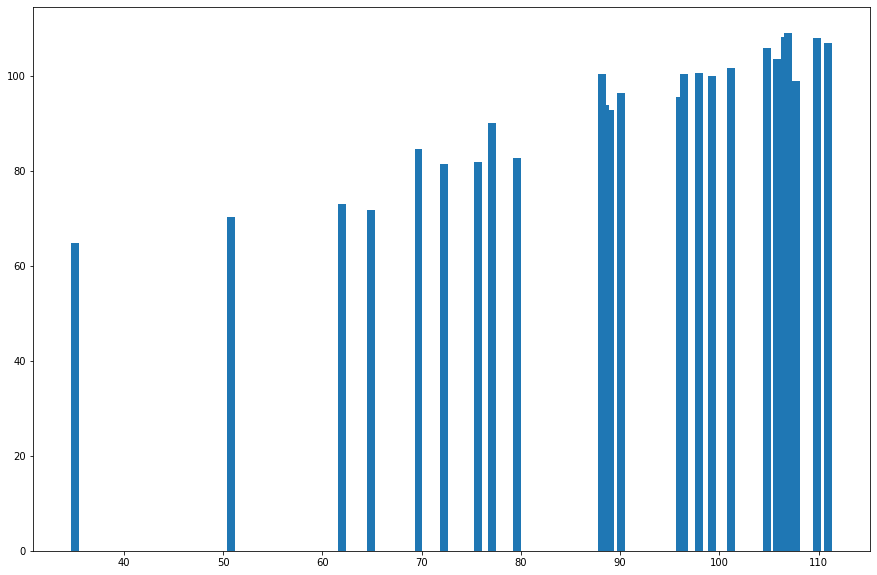

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(df['1 Região Norte'], df['2 Região Nordeste'])
plt.show()

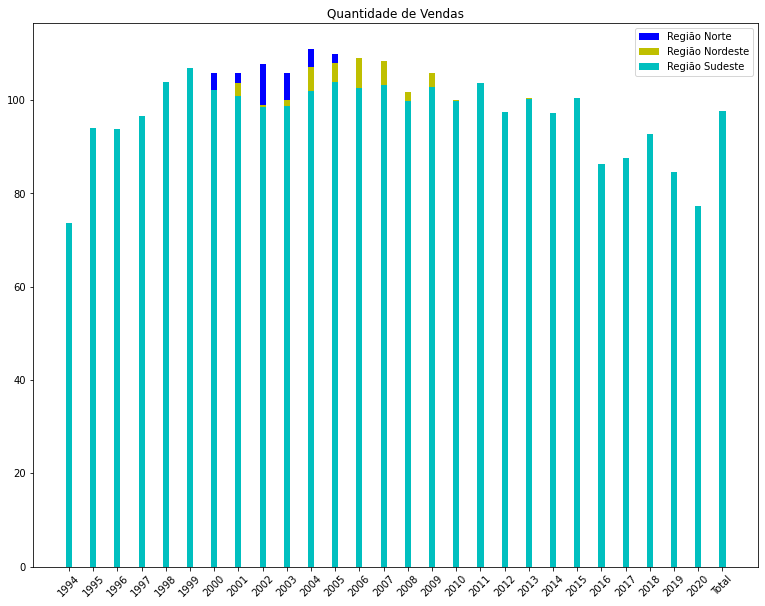

In [ ]:
# Quantidade de vendas para o Produto A
valores_produto_A = [6,7,8,4,4]

# Quantidade de vendas para o Produto B
valores_produto_B = [3,12,3,4.1,6]

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_A))
x2 = [x + 0.25 for x in x1]

plt.subplots(figsize=(13, 10))
plt.xticks(rotation=45)

# Plota as barras
plt.bar(df['Ano'], df['1 Região Norte'], width=0.25, label = 'Região Norte', color = 'b')
plt.bar(df['Ano'], df['2 Região Nordeste'], width=0.25, label = 'Região Nordeste', color = 'y')
plt.bar(df['Ano'], df['3 Região Sudeste'], width=0.25, label = 'Região Sudeste', color = 'c')

# coloca o nome dos meses como label do eixo x
meses = ['Agosto','Setembro','Outubro','Novembro','Dezembro']
#plt.xticks([x + 0.25 for x in range(len(valores_produto_A))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Quantidade de Vendas")
plt.show()

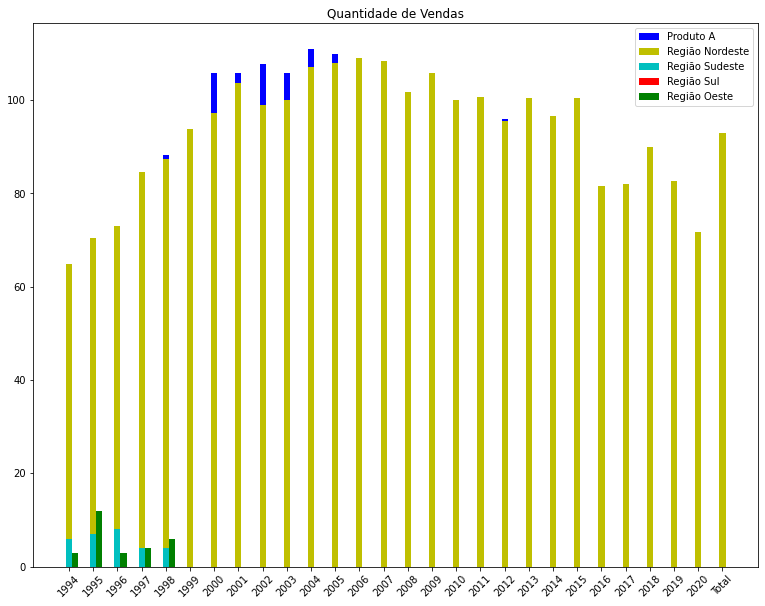

In [ ]:
# Quantidade de vendas para o Produto A
valores_produto_A = [6,7,8,4,4]

# Quantidade de vendas para o Produto B
valores_produto_B = [3,12,3,4.1,6]

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_A))
x2 = [x + 0.25 for x in x1]

plt.subplots(figsize=(13, 10))
plt.xticks(rotation=45)

# Plota as barras
plt.bar(df['Ano'], df['1 Região Norte'], width=0.25, label = 'Produto A', color = 'b')
plt.bar(df['Ano'], df['2 Região Nordeste'], width=0.25, label = 'Região Nordeste', color = 'y')
plt.bar(x1, valores_produto_A, width=0.25, label = 'Região Sudeste', color = 'c')
plt.bar(x2, valores_produto_B, width=0.25, label = 'Região Sul', color = 'r')
plt.bar(x2, valores_produto_B, width=0.25, label = 'Região Centro-Oeste', color = 'g')

# coloca o nome dos meses como label do eixo x
#meses = ['Agosto','Setembro','Outubro','Novembro','Dezembro']
#plt.xticks([x + 0.25 for x in range(len(valores_produto_A))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Quantidade de Vendas")
plt.show()

# Ano por Região

In [25]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_polio.csv")
df.head(5)

,Ano,1 Região Norte,2 Região Nordeste,3 Região Sudeste,4 Região Sul,5 Região Centro-Oeste,Total
0,1994,35.07,64.93,73.72,87.00,41.33,58.24
1,1995,50.83,70.36,94.11,86.29,58.92,77.83
2,1996,61.96,73.00,93.87,85.23,80.57,80.86
3,1997,69.68,84.65,96.64,94.62,85.90,89.27
4,1998,88.22,87.37,103.90,91.35,101.91,95.30


In [27]:
def BuscaAnoPorRegiao(ano, bases):
  doenca = []
  regiao1 = []
  regiao2 = []
  regiao3 = []
  regiao4 = []
  regiao5 = []
  total = []

  s = '/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/'
  for i in bases:
    r=s+i
    #print(r)
    base = pd.read_csv(r)
    for index, row in base.iterrows():
      if row['Ano'] == ano:
        doenca.append(i)
        regiao1.append(row['1 Região Norte'])
        regiao2.append(row['2 Região Nordeste'])
        regiao3.append(row['3 Região Sudeste'])
        regiao4.append(row['4 Região Sul'])
        regiao5.append(row['5 Região Centro-Oeste'])
        #total.append(row['Total'])

  new_tb = pd.DataFrame()

  new_tb['Doença'] = doenca
  new_tb['1 Região Norte'] = regiao1
  new_tb['2 Região Nordeste'] = regiao2
  new_tb['3 Região Sudeste'] = regiao3
  new_tb['4 Região Sul'] = regiao4
  new_tb['5 Região Centro-Oeste'] = regiao5
  #new_tb['Total'] = total

  return new_tb

In [28]:
ano_regiao = [
              'ano_regiao_bcg.csv',
              'ano_região_D1.csv',
              'ano_região_dtp.csv',
              'ano_regiao_febreamarela.csv',
              'ano_regiao_hepB.csv',
              'ano_regiao_polio.csv'
]
 
new_regiao=BuscaAnoPorRegiao('2020', ano_regiao)
new_regiao

,Doença,1 Região Norte,2 Região Nordeste,3 Região Sudeste,4 Região Sul,5 Região Centro-Oeste
0,ano_regiao_bcg.csv,76.37,70.19,69.11,83.88,78.45
1,ano_região_D1.csv,68.32,77.89,81.84,84.99,78.56
2,ano_regiao_febreamarela.csv,54.73,34.91,65.65,70.56,68.72
3,ano_regiao_hepB.csv,63.37,68.80,82.22,87.09,79.54
4,ano_regiao_polio.csv,64.90,71.74,77.38,85.76,79.79


Médias das Amostras
                2 Região Nordeste
1 Região Norte                   
35.07                       64.93
50.83                       70.36
61.96                       73.00
64.90                       71.74
69.68                       84.65
72.28                       81.55
75.67                       81.92
77.06                       90.04
79.59                       82.73
88.16                      100.44
88.22                       87.37
88.44                       93.87
89.03                       92.94
90.05                       96.50
96.00                       95.63
96.47                      100.44
97.91                      100.72
99.29                      100.00
101.20                     101.75
104.79                     105.88
105.86                     103.72
105.89                      99.99
105.90                      97.15
106.64                     108.35
106.91                     109.08
107.77                      99.05
109.83                     1

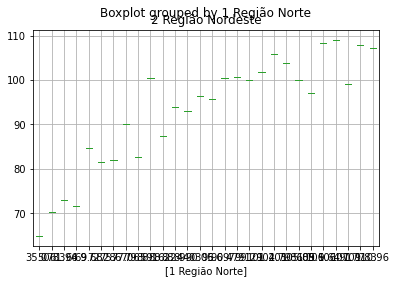

In [38]:
sub2 = df[['1 Região Norte', '2 Região Nordeste']].dropna()

print ('Médias das Amostras')
m1= sub2.groupby('1 Região Norte').mean()
print (m1)

print ('Desvio Padrão das Amostras')
sd1 = sub2.groupby('1 Região Norte').std()
print (sd1)

# Create the boxplot
sub2.boxplot(by='1 Região Norte')

In [55]:
import statsmodels.stats.multicomp as multi 
mc1 = multi.MultiComparison(df['1 Região Norte'], df['2 Região Nordeste'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
 64.93  70.36    15.76   0.1 -358.796 390.316  False
 64.93  71.74    29.83   0.1 -344.726 404.386  False
 64.93   73.0    26.89   0.1 -347.666 401.446  False
 64.93  81.55    37.21   0.1 -337.346 411.766  False
 64.93  81.92     40.6   0.1 -333.956 415.156  False
 64.93  82.73    44.52   0.1 -330.036 419.076  False
 64.93  84.65    34.61   0.1 -339.946 409.166  False
 64.93  87.37    53.15   0.1 -321.406 427.706  False
 64.93  90.04    41.99   0.1 -332.566 416.546  False
 64.93  92.94    53.96   0.1 -320.596 428.516  False
 64.93  93.87    53.37   0.1 -321.186 427.926  False
 64.93  95.63    60.93   0.1 -313.626 435.486  False
 64.93   96.5    54.98   0.1 -319.576 429.536  False
 64.93  97.15    70.83   0.1 -303.726 445.386  False
 64.93  99.05     72.7   0.1 -301.856 447.256  False
 64.93  99.99    70.82   0.1 -303.736 445.376 